In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt

# Erstellen Sie Ihre eigene Implementierung der PCA

In [3]:
class MyPCAeig:
    
    def __init__(self,num):
        self.num = num
              
    def fit(self,X):
       
        X_norm = X - X.mean(axis=0)
        self.mean_= X.mean(axis=0)
        n, m = X_norm.shape
        assert np.allclose(X_norm.mean(axis=0), np.zeros(m))
        cova = np.dot(X_norm.T, X_norm) / (n-1)
        
        eig_vals, eig_vecs = np.linalg.eig(cova)
      
        sorted_idxs = np.flip(eig_vals.argsort())[:self.num]
       
             
        self.total_variance = np.sum(eig_vals)

        
        self.components_ = eig_vecs[sorted_idxs].transpose()
        self.explained_variance_ = eig_vals[sorted_idxs]
        self.explained_variance_ratio_ = self.explained_variance_ / self.total_variance
        
    def transform(self,X):
        X_pca = X.dot(self.components_.T)
        return X_pca
    
    
    def fit_transform(self,X):
        self.fit(X)
        return(X.dot(self.components_.T)) 

# Testen Sie diese mittels folgender Daten

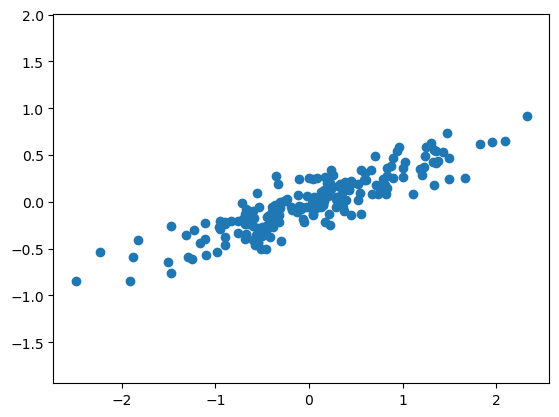

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [4]:
myPCAeig = MyPCAeig(2)
myPCAeig.fit(X)

print(myPCAeig.explained_variance_)
print("Erklaerte Varianz Ratio:")
print(myPCAeig.explained_variance_ratio_)

[0.7625315 0.0184779]
Erklaerte Varianz Ratio:
[0.97634101 0.02365899]


In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

0.7625315008826116
[0.94446029 0.32862557]
0.01847789551356259
[-0.32862557  0.94446029]


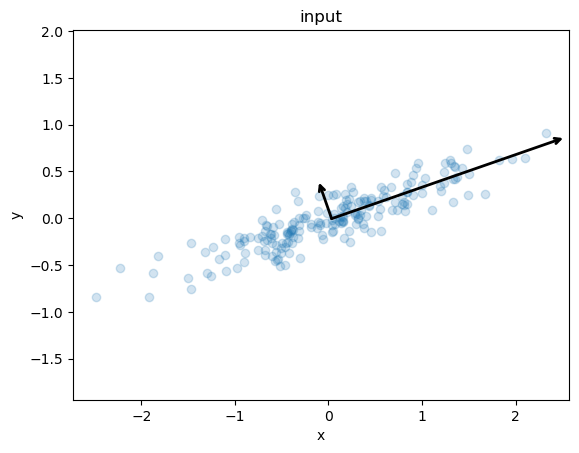

In [6]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('input')
for length, vector in zip(myPCAeig.explained_variance_, myPCAeig.components_):
    print(length)
    print(vector)
    v = vector* 3* np.sqrt(length) 
    draw_vector(myPCAeig.mean_, myPCAeig.mean_ + v)
plt.axis('equal');

[-0.62530162 -0.17006366]
[-0.64645981  0.04487173]


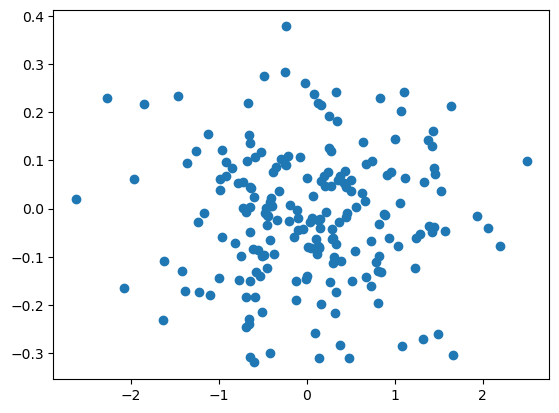

In [7]:
X_pca = myPCAeig.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])

print(X[0])
print(X_pca[0])

# Verwenden Sie nun die PCA aus sklearn und transformieren die 4d-Daten des Iris datensatzes in 2D.

In [8]:
from sklearn.decomposition import PCA

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

[4.22824171 0.24267075 0.0782095  0.02383509]
[0.92461872 0.05306648 0.01710261 0.00521218]


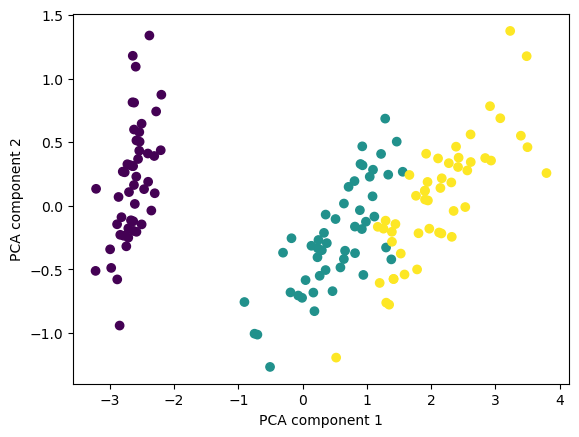

In [11]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')
X_pca=pca.fit_transform(X)
plt.xlabel('PCA component 1',size=10)
plt.ylabel('PCA component 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# Eigenfaces

## Laden Sie die lfw_people-Daten aus sklearn 

- from sklearn.datasets import fetch_lfw_people
- splitten Sie in train_test
- Berechnen sie die ersten 100 PCA-Komponenten
- Trainieren Sie damit eine SVM 
- oder ein Neuronales Netz, z.B.

   from sklearn.neural_network import MLPClassifier
   MLPClassifier(hidden_layer_sizes=(1024,1024,1024), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)



In [12]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier


lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(lfw_dataset.DESCR)

print(h)
print(w)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

(2914,)


(798, 2914)

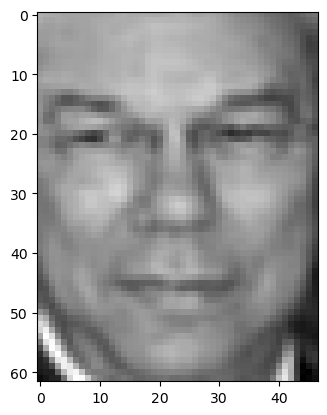

In [13]:
print(X_train[0].shape)

plt.imshow(X_train[0].reshape((h, w)), cmap=plt.cm.gray)

X_train.shape

In [14]:
print(target_names[y_train[0]])

Colin Powell


In [15]:
pca = PCA(n_components=2,whiten=True).fit(X_train)


X_train_pca = pca.transform(X_train)

In [16]:
x_spk0 = X_train_pca[np.where(y_train == 0)[0]]
x_spk1 = X_train_pca[np.where(y_train == 1)[0]]
x_spk2 = X_train_pca[np.where(y_train == 2)[0]]
x_spk3 = X_train_pca[np.where(y_train == 3)[0]]
x_spk4 = X_train_pca[np.where(y_train == 4)[0]]

print(x_spk0.shape)

(158, 2)


[13.422401  9.233638]
[0.2038769 0.1402525]


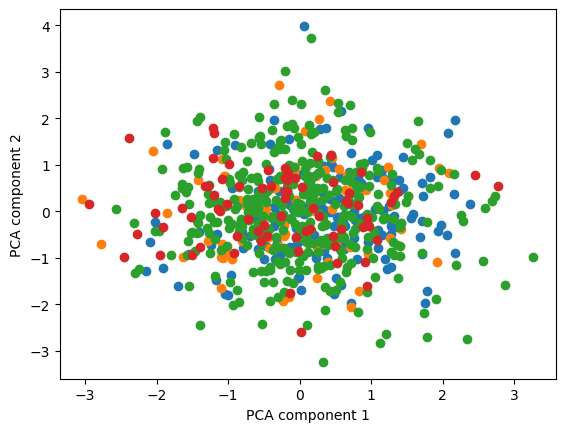

In [17]:
plt.xlabel('PCA component 1',size=10)
plt.ylabel('PCA component 2')
plt.scatter(x_spk0[:, 0], x_spk0[:, 1])
plt.scatter(x_spk1[:, 0], x_spk1[:, 1])
plt.scatter(x_spk2[:, 0], x_spk2[:, 1])
plt.scatter(x_spk3[:, 0], x_spk3[:, 1])
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

In [18]:
n_components = 100
pca = PCA(n_components=n_components).fit(X_train)


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
print(X_train_pca.shape)
print(np.sum(pca.explained_variance_ratio_))

(798, 100)
0.91311693


In [20]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,1024,1024), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.55187824
Validation score: 0.600000
Iteration 2, loss = 1.15939837
Validation score: 0.662500
Iteration 3, loss = 0.89818100
Validation score: 0.675000
Iteration 4, loss = 0.59850200
Validation score: 0.725000
Iteration 5, loss = 0.39072581
Validation score: 0.812500
Iteration 6, loss = 0.23229964
Validation score: 0.800000
Iteration 7, loss = 0.13415335
Validation score: 0.812500
Iteration 8, loss = 0.07513022
Validation score: 0.800000
Iteration 9, loss = 0.03974953
Validation score: 0.850000
Iteration 10, loss = 0.02059319
Validation score: 0.812500
Iteration 11, loss = 0.01370513
Validation score: 0.825000
Iteration 12, loss = 0.00640282
Validation score: 0.825000
Iteration 13, loss = 0.00442616
Validation score: 0.812500
Iteration 14, loss = 0.00298893
Validation score: 0.812500
Iteration 15, loss = 0.00169879
Validation score: 0.800000
Iteration 16, loss = 0.00136891
Validation score: 0.800000
Iteration 17, loss = 0

In [21]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.89      0.86      0.88        78
  Donald Rumsfeld       0.85      0.69      0.76        42
    George W Bush       0.87      0.93      0.90       153
Gerhard Schroeder       0.81      0.74      0.77        34
       Tony Blair       0.68      0.74      0.71        35

         accuracy                           0.85       342
        macro avg       0.82      0.79      0.80       342
     weighted avg       0.85      0.85      0.84       342



[[0.00135261 0.00140723 0.00150261 ... 0.00151687 0.00147537 0.00144353]
 [0.00138938 0.00146105 0.00158542 ... 0.00153745 0.00148339 0.00144591]
 [0.00143932 0.00152802 0.0016668  ... 0.00156818 0.00149037 0.00145065]
 ...
 [0.00124788 0.00129422 0.00133782 ... 0.00175352 0.00167521 0.00159796]
 [0.00120351 0.00125916 0.00132294 ... 0.0017826  0.00169243 0.00159932]
 [0.00116757 0.0012239  0.00129137 ... 0.00180443 0.00169663 0.0015869 ]]


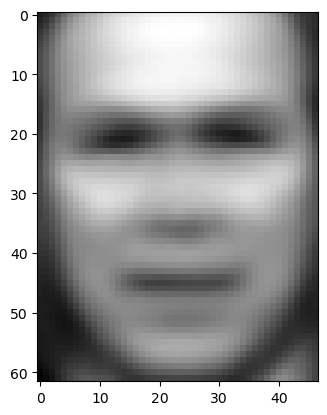

In [22]:
averageFace = np.array(pca.mean_.reshape((h, w)),dtype=float)/float(255)
plt.imshow(averageFace, cmap=plt.cm.gray)
print(averageFace)

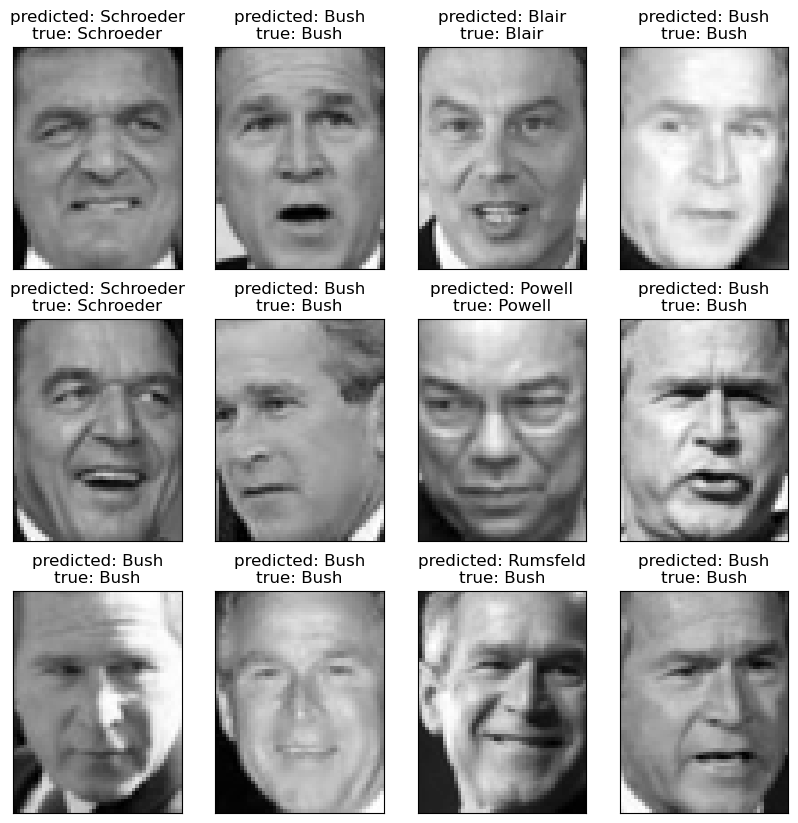

In [23]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(10,10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

(100, 62, 47)


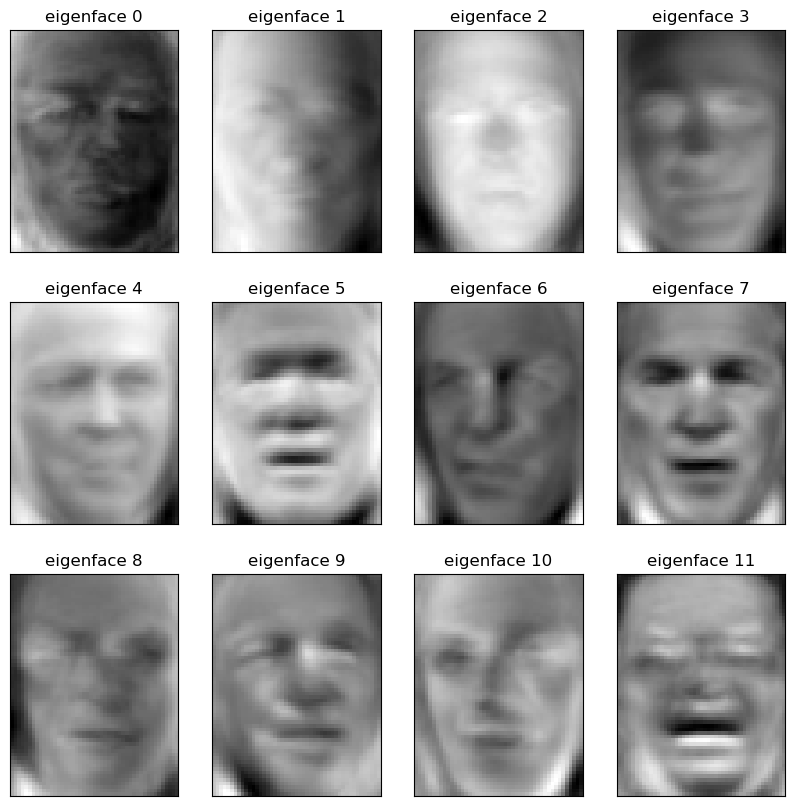

In [24]:
import numpy as np

eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces = np.array(eigenfaces,dtype=float)/float(255)
print(eigenfaces.shape)
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)